1. Loading the dataset:


First of all we will import some libraries for analysis and model building:

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Loading the dataset.


In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'


In [7]:
col_name = ['sepal-length','sepal-width','petal-length','petal-width','class']


In [8]:
dataset = pd.read_csv(url, names = col_name)

In [9]:
dataset.shape

(150, 5)

In [10]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


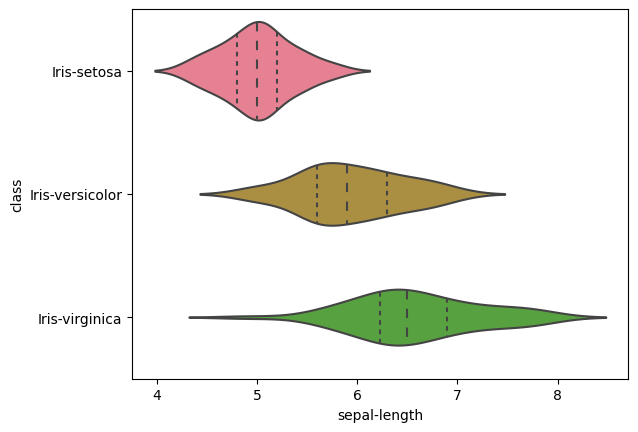

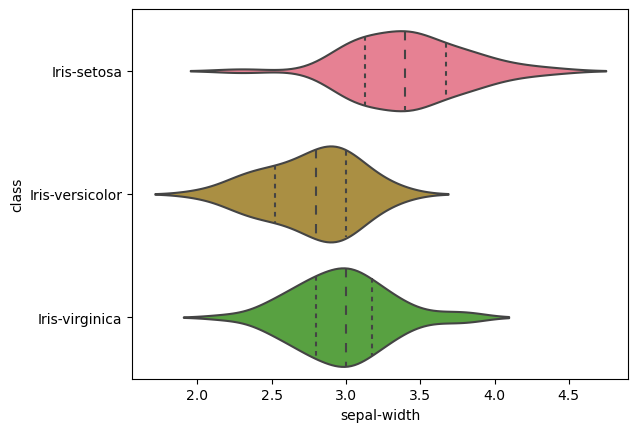

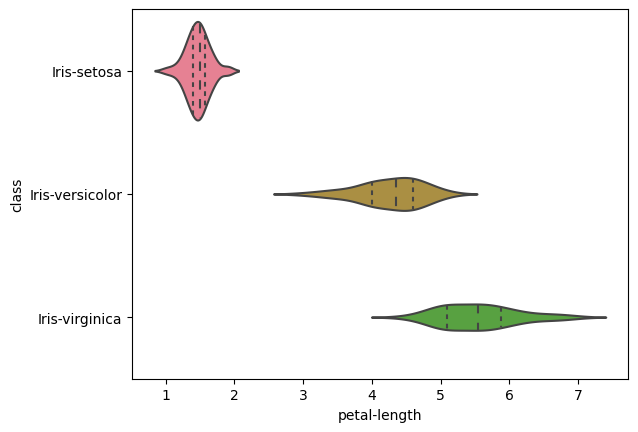

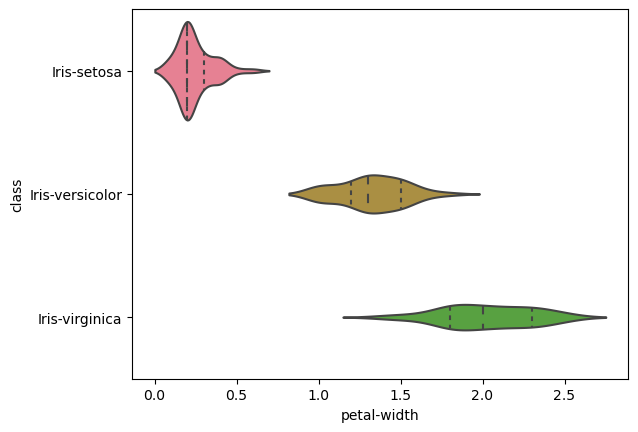

In [15]:
sns.violinplot(y='class', x='sepal-length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

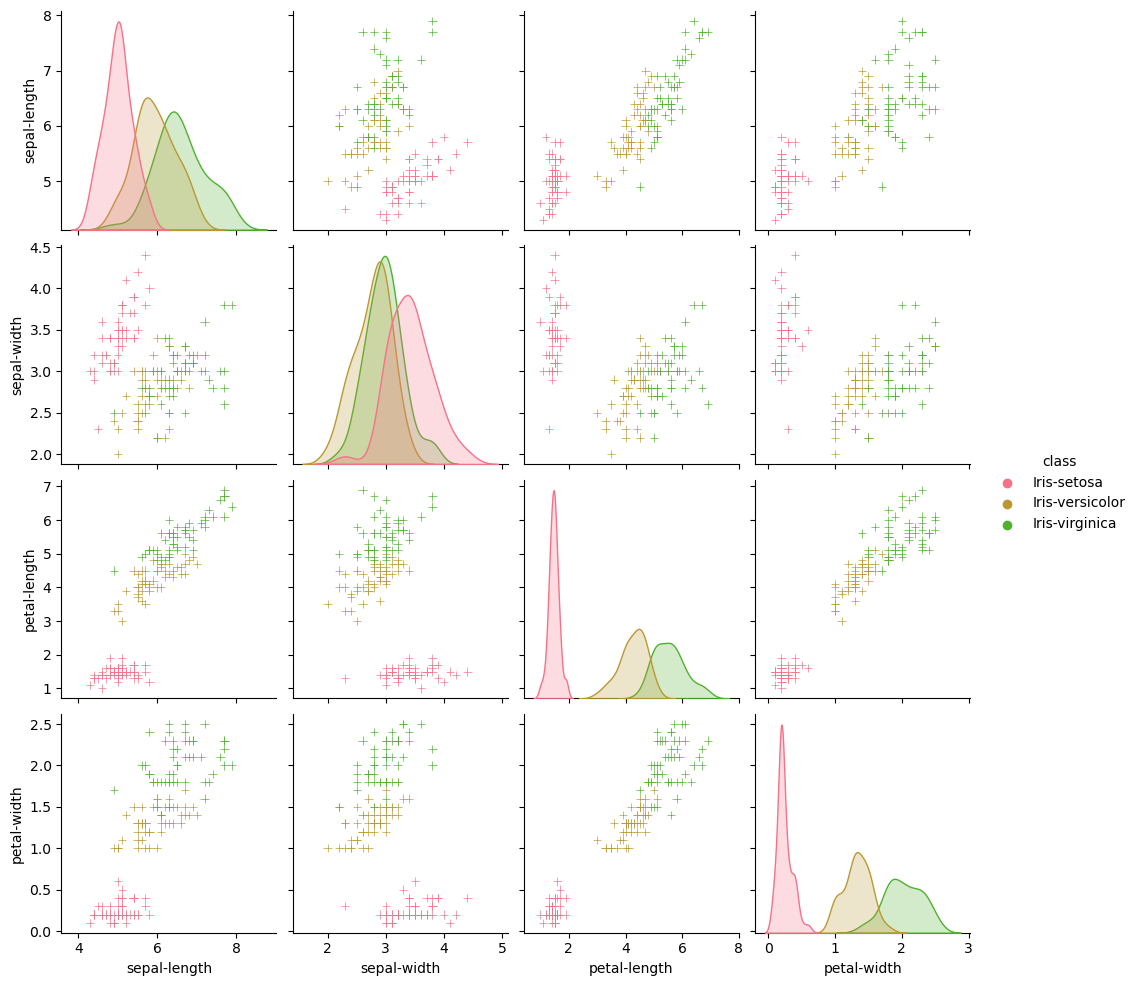

In [16]:
sns.pairplot(dataset, hue='class', markers='+')
plt.show()

C:\Windows\Temp\ipykernel_2948\2534119662.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')


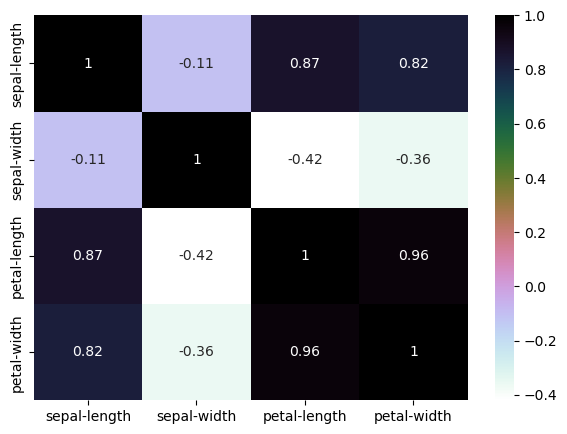

In [17]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [18]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
models = []
models.append(('LR', LogisticRegression(max_iter=3000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=18, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    


LR: 0.974868 (0.056384)
LDA: 0.974868 (0.056384)
KNN: 0.958995 (0.066309)
CART: 0.957672 (0.068528)
NB: 0.949735 (0.090451)
SVC: 0.982804 (0.048799)


In [39]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [40]:
AC = accuracy_score(y_test, prediction)

In [41]:
print(f'Test Accuracy: {AC*100}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 96.66666666666667
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

